## **U.S. Post Office Analysis**

With the 2020 Presisential election fast approaching, and the huge amount of mail-in ballots expected to be cast due to COVID-19, the postal service has been front and center in the news lately. I stumbled accross this webpage,
[Pieces of mail since 1789](https://about.usps.com/who-we-are/postal-history/pieces-of-mail-since-1789.htm). 

I scraped the table containg # of post offices, pieces handled, total revenue and total expenses for each year so I could play around with the data.

#### A few factoids about this dataset and the USPS:
* Income/expenses listed for 1789 account for only three months. *(I multiplied the amt by 4 to estimate a full year)*
* Income first exceeded one million dollars in 1815.
* Expenses first exceeded one million dollars in 1818.
* The number of Post Offices peaked in 1901. The growth of rural free delivery, which became a permanent service in 1902, contributed to subsequent declines in the number of Post Offices.
* Income and expenses first exceeded one billion dollars in 1944.
* Effective July 1, 1971, the Post Office Department was transformed into the United States Postal Service, an independent establishment of the executive branch of the Government of the United States.
* The Postal Service last received a public service subsidy (taxpayer dollars) in 1982.

In [1]:
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import requests
import matplotlib as plt
%matplotlib inline

In [2]:
pd.options.display.float_format = '{:,.2f}'.format

In [3]:
url = 'https://about.usps.com/who-we-are/postal-history/pieces-of-mail-since-1789.htm'
sess = requests.Session()
# work around browser cookie settings and infinite loops.
sess.headers['User-Agent'] = 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_2) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/34.0.1847.131 Safari/537.36'
res = sess.get(url)

In [4]:
pd.set_option('display.max_rows', 250)
pd.set_option('max_colwidth', 50)

In [5]:
soup = BeautifulSoup(res.content, 'lxml')
table = soup.find_all('table')[0]

In [6]:
dfs = pd.read_html(str(table))
df = dfs[0]
df

,Year,Pieces of Mail Handled,Number of Post Offices,Income,Expenses
0,1789,NaN,75,"$ 7,510","$ 7,560"
1,Income and expenses listed for 1789 are for th...,Income and expenses listed for 1789 are for th...,Income and expenses listed for 1789 are for th...,Income and expenses listed for 1789 are for th...,Income and expenses listed for 1789 are for th...
2,1790,NaN,75,37935,32140
3,1791,NaN,89,46294,36697
4,1792,NaN,195,67443,54530
5,1793,NaN,209,104746,72039
6,1794,NaN,450,128947,89972
7,1795,NaN,453,160620,117893
8,1796,NaN,468,195066,131571
9,1797,NaN,554,213998,150114


In [7]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238 entries, 0 to 237
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Year                    238 non-null    object
 1   Pieces of Mail Handled  131 non-null    object
 2   Number of Post Offices  238 non-null    object
 3   Income                  238 non-null    object
 4   Expenses                238 non-null    object
dtypes: object(5)
memory usage: 9.4+ KB


In [8]:
def color_negative_red(value):
  """
  Colors elements in a dateframe
  green if positive and red if
  negative. Does not color NaN
  values.
  
  courtesy www.mode.com 
  """
  if value < 0:
    color = 'red'
  elif value > 0:
    color = 'green'
  else:
    color = 'black'

  return 'color: %s' % color

In [9]:
# check point
df2 = df.copy()
# keep only rows with an actual year in the 'Year' col.
pattern = r'[0-9]{4}$'
filter = df2['Year'].str.contains(pattern) 
df2 = df2[filter]

In [10]:
df2.head()

,Year,Pieces of Mail Handled,Number of Post Offices,Income,Expenses
0,1789,NaN,75,"$ 7,510","$ 7,560"
2,1790,NaN,75,37935,32140
3,1791,NaN,89,46294,36697
4,1792,NaN,195,67443,54530
5,1793,NaN,209,104746,72039


In [11]:
# needs fix
df2.at[0, 'Income'] = 7510
df2.at[0, 'Expenses'] = 7560
df2.columns = ['Year', 'Pcs_in_Billions', 'Post_Offices', 'Income', 'Expenses']
df2.head()

,Year,Pcs_in_Billions,Post_Offices,Income,Expenses
0,1789,NaN,75,7510,7560
2,1790,NaN,75,37935,32140
3,1791,NaN,89,46294,36697
4,1792,NaN,195,67443,54530
5,1793,NaN,209,104746,72039


In [12]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 231 entries, 0 to 237
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Year             231 non-null    object
 1   Pcs_in_Billions  124 non-null    object
 2   Post_Offices     231 non-null    object
 3   Income           231 non-null    object
 4   Expenses         231 non-null    object
dtypes: object(5)
memory usage: 20.8+ KB


In [13]:
col_list = ['Pcs_in_Billions', 'Post_Offices', 'Income', 'Expenses']
# convert to strings
for col in col_list:
    df2[col] = pd.to_numeric(df2[col])
# 'Pieces_Handled' from float to Int64.
    df2 = df2.convert_dtypes() 
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 231 entries, 0 to 237
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Year             231 non-null    string
 1   Pcs_in_Billions  124 non-null    Int64 
 2   Post_Offices     231 non-null    Int64 
 3   Income           231 non-null    Int64 
 4   Expenses         231 non-null    Int64 
dtypes: Int64(4), string(1)
memory usage: 21.7 KB


In [14]:
# data for yr 1789 is 3mo only. Multiply by 4 to estimate full year.
df2.at[0, 'Income'] = df2.at[0, 'Income'] * 4
df2.at[0, 'Expenses'] = df2.at[0, 'Expenses'] * 4

df2['Pcs_in_Billions'] = df2['Pcs_in_Billions']

In [31]:
# check point
df3 = df2.copy()
df3['Net_Profit'] = df3['Income'] - df3['Expenses']
df3['Net_Margin(%)'] = round(df3['Net_Profit']/df3['Income'], 2)
df3.head()

,Year,Pcs_in_Billions,Post_Offices,Income,Expenses,Net_Profit,Net_Margin(%)
0,1789,<NA>,75,30040,30240,-200,-0.01
2,1790,<NA>,75,37935,32140,5795,0.15
3,1791,<NA>,89,46294,36697,9597,0.21
4,1792,<NA>,195,67443,54530,12913,0.19
5,1793,<NA>,209,104746,72039,32707,0.31


In [32]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 231 entries, 0 to 237
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Year             231 non-null    string 
 1   Pcs_in_Billions  124 non-null    Int64  
 2   Post_Offices     231 non-null    Int64  
 3   Income           231 non-null    Int64  
 4   Expenses         231 non-null    Int64  
 5   Net_Profit       231 non-null    Int64  
 6   Net_Margin(%)    231 non-null    float64
dtypes: Int64(5), float64(1), string(1)
memory usage: 25.6 KB


In [33]:
df3['P/L_per_Office'] = round(df3['Net_Profit']/df3['Post_Offices'], 2)
df3['P/L_per_Item'] = round(df3['Net_Profit']/(df3['Pcs_in_Billions']), 4)

In [34]:
df3.columns

Index(['Year', 'Pcs_in_Billions', 'Post_Offices', 'Income', 'Expenses',
       'Net_Profit', 'Net_Margin(%)', 'P/L_per_Office', 'P/L_per_Item'],
      dtype='object')

In [35]:
(df3.style
    .applymap(color_negative_red,
               subset=['Income', 'Expenses','Net_Profit','Net_Margin(%)',
                       'P/L_per_Office', 'P/L_per_Item'])
    .format({"Post_Offices": "{:,.0f}", "Income": "${:,.0f}",
                "Expenses": "${:,.0f}", "Net_Profit": "${:,.0f}",
                "Net_Margin": "{:.2%}","P/L_per_Office": "${:.2f}",
                "P/L_per_Item": "${:,.4f}"})
    .hide_index())

Year,Pcs_in_Billions,Post_Offices,Income,Expenses,Net_Profit,Net_Margin(%),P/L_per_Office,P/L_per_Item
1789,,75,"$30,040","$30,240",$-200,-0.010000,$-2.67,$nan
1790,,75,"$37,935","$32,140","$5,795",0.150000,$77.27,$nan
1791,,89,"$46,294","$36,697","$9,597",0.210000,$107.83,$nan
1792,,195,"$67,443","$54,530","$12,913",0.190000,$66.22,$nan
1793,,209,"$104,746","$72,039","$32,707",0.310000,$156.49,$nan
1794,,450,"$128,947","$89,972","$38,975",0.300000,$86.61,$nan
1795,,453,"$160,620","$117,893","$42,727",0.270000,$94.32,$nan
1796,,468,"$195,066","$131,571","$63,495",0.330000,$135.67,$nan
1797,,554,"$213,998","$150,114","$63,884",0.300000,$115.31,$nan
1798,,639,"$232,977","$179,084","$53,893",0.230000,$84.34,$nan


/Users/michaelpatterson/anaconda3/envs/usps_env/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:xlabel='Year'>

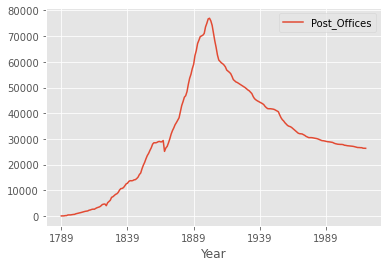

In [36]:
# Graph the number of post offices over time.
df3.plot('Year', 'Post_Offices')



In [37]:
most_profit = df3.sort_values('Net_Profit', ascending=False).iloc[:5][['Year', 'Net_Profit']]
most_profit.Net_Profit = most_profit.Net_Profit
most_profit.style.hide_index()

Year,Net_Profit
2003,4627000000
1995,3563300000
1996,3289000000
2004,3145000000
1997,3085000000


<AxesSubplot:xlabel='Year'>

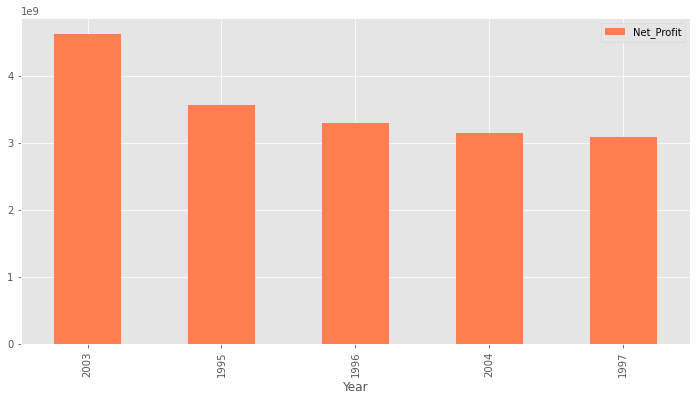

In [38]:
plt.style.use('ggplot')
most_profit.plot.bar('Year', 'Net_Profit',  color='Coral', figsize=(12,6))
